In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import pyrootutils

base_path = pyrootutils.setup_root(
    search_from=".",
    indicator=[".gitignore"],
    project_root_env_var=True,  # set the PROJECT_ROOT environment variable to root directory
    dotenv=True,  # load environment variables from .env if exists in root directory
    pythonpath=True,  # add root directory to the PYTHONPATH (helps with imports)
    cwd=True,  # change current working directory to the root directory (helps with filepaths)
)

import sys
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import json
import wandb
import matplotlib
import matplotlib as mpl
from itertools import combinations
import os
import shutil
from IPython.display import display
from pprint import pprint

from src.utils.metrics import *
from src.data.utils import *
from src.utils.eval import *
from src.utils.wandb import *

from src.data.utils import *
from src.utils.data_paths_valid import *
# from src.utils.data_paths_anca import *

sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

import warnings
# warnings.simplefilter('error')
# warnings.simplefilter("default")

## Define paths

In [6]:
sc_paths, st_paths, simulation_paths, experiment_paths = get_paths_for_processing(
    base_path,
    st_data_files,
    sc_data_files,
    celltype_cols,
    extra_settings_sim,
    extra_settings_prep,
    data_dir="data",
    use_old_experiment_paths=True,
    experiment_dirs=experiment_dirs,
)
dataset_names_orig = dataset_names
dataset_map = get_dataset_map(experiment_paths, dataset_names)
dataset_path_map = get_dataset_path_map(st_paths, dataset_names)
dataset_names


['slideSeqv2-kidney-2a',
 'slideSeqv2-kidney-4b',
 'seqFISH-heart-1',
 'seqFISH-heart-2',
 'seqFISH-heart-3',
 'MERFISH-hypothalamus-0',
 'MERFISH-hypothalamus-1',
 'Visium-mouse-brain',
 'Visium-lymph-node',
 'slideSeqv2-kidney-2a (sc. ref.)',
 'slideSeqv2-kidney-4b (sc. ref.)',
 'seqFISH-heart-1 (switched)',
 'seqFISH-heart-2 (switched)',
 'MERFISH-hypothalamus-0 (switched)',
 'MERFISH-hypothalamus-1 (switched)',
 'slideSeqv2-kidney-2a (sc. ref., not var. cut.)',
 'slideSeqv2-kidney-4b (sc. ref., not var. cut.)']

## Visualize data

In [4]:
st_data = sc.read_h5ad(dataset_path_map["slideSeqv2-kidney-2a (sc. ref.)"])
st_data.obs.columns

Index(['row', 'col', 'blood vessel smooth muscle cell', 'endothelial cell',
       'kidney collecting duct intercalated cell',
       'kidney collecting duct principal cell',
       'kidney distal convoluted tubule epithelial cell',
       'kidney granular cell', 'kidney interstitial fibroblast',
       'kidney loop of Henle thick ascending limb epithelial cell',
       'kidney proximal convoluted tubule epithelial cell', 'leukocyte',
       'macrophage', 'mesangial cell', 'podocyte'],
      dtype='object')

In [12]:
sc_paths

['/data/DISSECT/data/spatial/kidney_slideSeq_v2/UMOD-WT.WT-2a.h5ad',
 '/data/DISSECT/data/spatial/kidney_slideSeq_v2/UMOD-KI.KI-4b.h5ad',
 '/data/DISSECT/data/spatial/heart_seqFISH/embryo1.h5ad',
 '/data/DISSECT/data/spatial/heart_seqFISH/embryo2.h5ad',
 '/data/DISSECT/data/spatial/heart_seqFISH/embryo3.h5ad',
 '/data/DISSECT/data/spatial/hypothalamus_MERFISH/0.h5ad',
 '/data/DISSECT/data/spatial/hypothalamus_MERFISH/1.h5ad',
 '/data/DISSECT/data/single-cell/Allenbrain_forSimulation_uniquect.h5ad',
 '/data/DISSECT/data/single-cell/lymph_node/sc_lymph.h5ad',
 '/data/DISSECT/data/single-cell/kidney/kidney_full_v3_harmonized_celltypes_raw_mouseGenes.h5ad',
 '/data/DISSECT/data/single-cell/kidney/kidney_full_v3_harmonized_celltypes_raw_mouseGenes.h5ad',
 '/data/DISSECT/data/spatial/heart_seqFISH/embryo3.h5ad',
 '/data/DISSECT/data/spatial/heart_seqFISH/embryo3.h5ad',
 '/data/DISSECT/data/spatial/hypothalamus_MERFISH/2.h5ad',
 '/data/DISSECT/data/spatial/hypothalamus_MERFISH/2.h5ad',
 '/dat

In [13]:
sc_data = sc.read_h5ad(sc_paths[-1])
sc_data = sc.read_h5ad("./data/single-cell/kidney/kidney_full_v3_harmonized_celltypes.h5ad")
sc_data

AnnData object with n_obs × n_vars = 40030 × 33694
    obs: 'Barcode', 'Short_Sample', 'Project', 'Experiment', 'celltype', 'compartment', 'broad_celltype', 'cell_type'
    var: 'ID', 'Symbol'
    obsm: 'X_umap'
    layers: 'corrected_counts', 'counts'

In [94]:
# merfish_paths = [
#     "./data/spatial/hypothalamus_MERFISH/0.h5ad",
#     "./data/spatial/hypothalamus_MERFISH/1.h5ad",
#     "./data/spatial/hypothalamus_MERFISH/2.h5ad",
# ]
# for path_1 in merfish_paths:
#     data_1 = sc.read_h5ad(path_1)
#     for path_2 in merfish_paths:
#         data_2 = sc.read_h5ad(path_2)
#         print(path_1, path_2, set(data_1.obs["cell_type"].unique()) == set(data_2.obs["cell_type"].unique()))

./data/spatial/hypothalamus_MERFISH/0.h5ad ./data/spatial/hypothalamus_MERFISH/0.h5ad True
./data/spatial/hypothalamus_MERFISH/0.h5ad ./data/spatial/hypothalamus_MERFISH/1.h5ad True
./data/spatial/hypothalamus_MERFISH/0.h5ad ./data/spatial/hypothalamus_MERFISH/2.h5ad True
./data/spatial/hypothalamus_MERFISH/1.h5ad ./data/spatial/hypothalamus_MERFISH/0.h5ad True
./data/spatial/hypothalamus_MERFISH/1.h5ad ./data/spatial/hypothalamus_MERFISH/1.h5ad True
./data/spatial/hypothalamus_MERFISH/1.h5ad ./data/spatial/hypothalamus_MERFISH/2.h5ad True
./data/spatial/hypothalamus_MERFISH/2.h5ad ./data/spatial/hypothalamus_MERFISH/0.h5ad True
./data/spatial/hypothalamus_MERFISH/2.h5ad ./data/spatial/hypothalamus_MERFISH/1.h5ad True
./data/spatial/hypothalamus_MERFISH/2.h5ad ./data/spatial/hypothalamus_MERFISH/2.h5ad True


In [ ]:
# sc_data = sc.read_h5ad(sc_paths[0])
# # convert cell_type collumn into separate dataframe
# for cell_type in sc_data.obs["cell_type"].unique():
#     sc_data.obs[cell_type] = (sc_data.obs["cell_type"] == cell_type).astype(int)
# sc.pl.spatial(sc_data, color=sc_data.obs["cell_type"].unique(), show=True)

## Get results for additional methods

### Load original DISSECT results

In [4]:
# dissect_results, ensemble_result = load_dissect_results(experiment_path)
ensemble_results = [load_dissect_results(experiment_path)[1] for experiment_path in experiment_paths[0:-2]]
dissect_dataset_names = [extract_dataset_name(path, dataset_map) for path in experiment_paths[0:len(ensemble_results)]]
dissect_names = len(dissect_dataset_names) * ["DISSECT (ensemble)"]

In [82]:
ensemble_results[0]

blood vessel smooth muscle cell  endothelial cell  \
0_20                         0.070197          0.082763   
0_21                         0.032877          0.073902   
0_22                         0.021406          0.080350   
0_23                         0.012979          0.031930   
0_24                         0.047739          0.047609   
...                               ...               ...   
9_55                         0.075353          0.038479   
9_56                         0.039337          0.054429   
9_57                         0.079385          0.133796   
9_8                          0.098331          0.051842   
9_9                          0.034492          0.076073   

      kidney collecting duct intercalated cell  \
0_20                                  0.076522   
0_21                                  0.013271   
0_22                                  0.023387   
0_23                                  0.021703   
0_24                                  0.039311   
...                                        ...   
9_55                                  0.019369   
9_56                                  0.011379   
9_57                                  0.042240   
9_8                                   0.035419   
9_9                                   0.009700   

      kidney collecting duct principal cell  \
0_20                               0.069793   
0_21                               0.024880   
0_22                               0.025803   
0_23                               0.016811   
0_24                               0.049376   
...                                     ...   
9_55                               0.043883   
9_56                               0.043048   
9_57                               0.055317   
9_8                                0.071323   
9_9                                0.028945   

      kidney distal convoluted tubule epithelial cell  kidney granular cell  \
0_20                                         0.073809              0.065479   
0_21                                         0.095639              0.012947   
0_22                                         0.053593              0.026225   
0_23                                         0.035826              0.024405   
0_24                                         0.079620              0.013915   
...                                               ...                   ...   
9_55                                         0.062504              0.040122   
9_56                                         0.083926              0.038462   
9_57                                         0.087703              0.054221   
9_8                                          0.138031              0.023396   
9_9                                          0.135924              0.007980   

      kidney interstitial fibroblast  \
0_20                        0.082292   
0_21                        0.017085   
0_22                        0.024170   
0_23                        0.023215   
0_24                        0.015661   
...                              ...   
9_55                        0.053118   
9_56                        0.023543   
9_57                        0.084517   
9_8                         0.030172   
9_9                         0.024452   

      kidney loop of Henle thick ascending limb epithelial cell  \
0_20                                           0.073965           
0_21                                           0.109985           
0_22                                           0.051636           
0_23                                           0.030268           
0_24                                           0.070380           
...                                                 ...           
9_55                                           0.030117           
9_56                                           0.030904           
9_57                                           0.058029           
9_8                            

### Load RCTD results

In [5]:
rctd_result_paths = [
    "./logs/results/rctd/results/UMOD-WT.WT-2a_resolution75.csv",
    "./logs/results/rctd/results/UMOD-KI.KI-4b_resolution105.csv",
    "./logs/results/rctd/results/embryo1_resolution0.11.csv",
    "./logs/results/rctd/results/embryo2_resolution0.11.csv",
    "./logs/results/rctd/results/embryo3_resolution0.11.csv",
    "./logs/results/rctd/results/st_lymph.csv",
    "./logs/results/rctd/results/UMOD-WT.WT-2a_resolution75_refAtlas.csv",
    "./logs/results/rctd/results/UMOD-KI.KI-4b_resolution105_refAtlas.csv",
    "./logs/results/rctd/results/embryo1_resolution0.11_switch_reference.csv",
    "./logs/results/rctd/results/embryo2_resolution0.11_switch_reference.csv",
    "./logs/results/rctd/results/0_resolution0.04_switch_reference.csv",
    "./logs/results/rctd/results/1_resolution0.04_switch_reference.csv",
]
rctd_results = []
for path in rctd_result_paths:
    result = pd.read_csv(path)
    result = result.set_index("Unnamed: 0")
    # normlize to 1
    result = result.div(result.sum(axis=1), axis=0)
    rctd_results.append(result)
rctd_dataset_names = dataset_names_orig[0:5] + dataset_names_orig[8:9] + dataset_names_orig[-8:-2]
assert(len(rctd_results) == len(rctd_dataset_names))
pprint(rctd_dataset_names)
rctd_names = ["RCTD" for i in rctd_results]


['slideSeqv2-kidney-2a',
 'slideSeqv2-kidney-4b',
 'seqFISH-heart-1',
 'seqFISH-heart-2',
 'seqFISH-heart-3',
 'Visium-lymph-node',
 'slideSeqv2-kidney-2a (sc. ref.)',
 'slideSeqv2-kidney-4b (sc. ref.)',
 'seqFISH-heart-1 (switched)',
 'seqFISH-heart-2 (switched)',
 'MERFISH-hypothalamus-0 (switched)',
 'MERFISH-hypothalamus-1 (switched)']


In [88]:
rctd_results[-2].sum(axis=1)

Unnamed: 0
0_24     1.0
10_1     1.0
10_10    1.0
10_11    1.0
10_12    1.0
        ... 
9_5      1.0
9_6      1.0
9_7      1.0
9_8      1.0
9_9      1.0
Length: 614, dtype: float64

In [78]:
ensemble_results[-2]

Ambiguous  Astrocyte  Endothelial  Ependymal  Excitatory  Inhibitory  \
0_24    0.027830   0.801557     0.023429   0.035927    0.018394    0.012080   
10_1    0.207189   0.149607     0.008871   0.021699    0.101984    0.146729   
10_10   0.176752   0.060129     0.036213   0.062456    0.256379    0.167512   
10_11   0.230561   0.096419     0.290157   0.019828    0.107266    0.138709   
10_12   0.068418   0.017513     0.025830   0.486516    0.185198    0.161678   
...          ...        ...          ...        ...         ...         ...   
9_5     0.117056   0.012264     0.121687   0.019711    0.571126    0.037500   
9_6     0.114518   0.007397     0.254880   0.009765    0.500652    0.071456   
9_7     0.199163   0.035689     0.073889   0.022863    0.362039    0.132103   
9_8     0.248504   0.152909     0.102909   0.040753    0.136810    0.156350   
9_9     0.239867   0.056708     0.227763   0.025395    0.065736    0.332205   

       Microglia  OD Immature  OD Mature  Pericytes  
0_24    0.027684     0.014821   0.016835   0.021443  
10_1    0.235791     0.019147   0.101750   0.007233  
10_10   0.030194     0.192072   0.007721   0.010573  
10_11   0.007578     0.078822   0.008212   0.022448  
10_12   0.007880     0.024473   0.012870   0.009624  
...          ...          ...        ...        ...  
9_5     0.012260     0.095141   0.006229   0.007025  
9_6     0.013288     0.015973   0.006084   0.005986  
9_7     0.115939     0.041369   0.006523   0.010422  
9_8     0.016593     0.119264   0.008904   0.017005  
9_9     0.007902     0.015285   0.014348   0.014791  

[614 rows x 10 columns]

### Load Cell2location results

### Load Linear baseline results

In [6]:
linear_runs = get_runs_for_tags_and_filters(baseline_tag="hard-exp", project="ssl-decon")
linear_results = [get_result_for_run(run) for run in linear_runs]
linear_dataset_names = [get_dataset_name_for_run(run, dataset_map, dataset_path_map) for run in linear_runs]
linear_names = ["Linear baseline"] * len(linear_runs)
print(linear_dataset_names)

Loaded 2 runs
['slideSeqv2-kidney-2a (sc. ref.)', 'slideSeqv2-kidney-4b (sc. ref.)']


### Load GraphST results

In [7]:
graph_st_result_paths = [
    "/data/GraphST/Data/slideseq_105_result.h5ad",
    "/data/GraphST/Data/slideseq_75_result.h5ad",
    "/data/GraphST/Data/seqfish_result.h5ad",
]
graphst_dataset_names = ["slideSeq-4b", "slideSeq-2a", "seqFISH"]
graph_st_names = len(dataset_names) * ["GraphST"]
graph_st_results = []
for path in graph_st_result_paths:
    result = sc.read_h5ad(path)
    graph_st_results.append(result.obs[result.obs.columns[2::]])
    print(len(result.obs.index))

1803
3244
1640


### Combine results

In [8]:
extra_results = [
    ensemble_results,
    # graph_st_results,
    rctd_results,
    linear_results,
]
extra_names = [
    dissect_names,
    # graph_st_names,
    rctd_names,
    linear_names,
]
extra_dataset_names = [
    dissect_dataset_names,
    # graphst_dataset_names,
    rctd_dataset_names,
    linear_dataset_names,
]
extra_results = [item for sublist in extra_results for item in sublist]
extra_names = [item for sublist in extra_names for item in sublist]
extra_dataset_names = [item for sublist in extra_dataset_names for item in sublist]

In [105]:
print(len(extra_results))

29


## Evaluate results

In [11]:
project = "multi-channel-gnn"
baseline_tag = "latestv2-switched"
# baseline_tag = "latestv2"
ablation_tag = "ablation-hard"
ablation_tag = None
dataset_filter = dataset_names_orig[0:2]# + dataset_names_orig[5:7]
# dataset_filter = dataset_names_orig[0:0] + dataset_names_orig[8:8] + dataset_names_orig[-8:-6]
dataset_filter = dataset_names_orig[-8:-6]
print(dataset_filter)

['slideSeqv2-kidney-2a (sc. ref.)', 'slideSeqv2-kidney-4b (sc. ref.)']


Loaded 10 runs


100%|██████████| 10/10 [00:02<00:00,  4.63it/s]


Number of methods: 10
Adding 29 extra results to evaluation...


100%|██████████| 17/17 [00:11<00:00,  1.52it/s]


Number of special names: 0


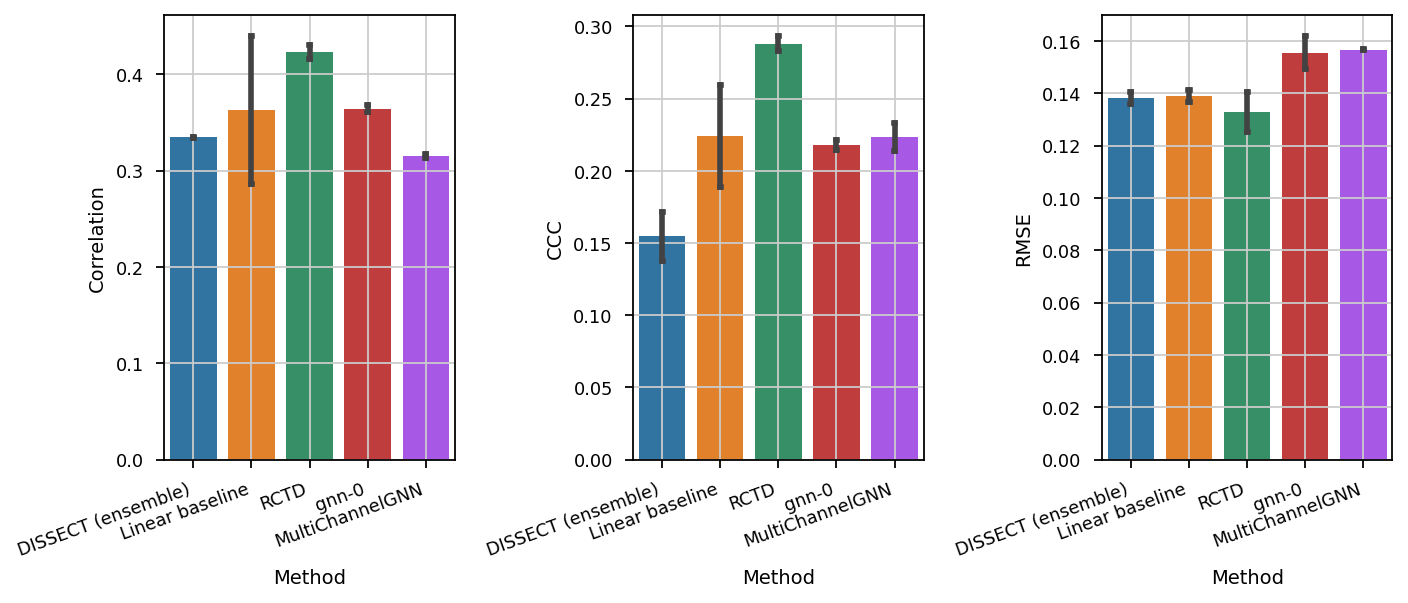

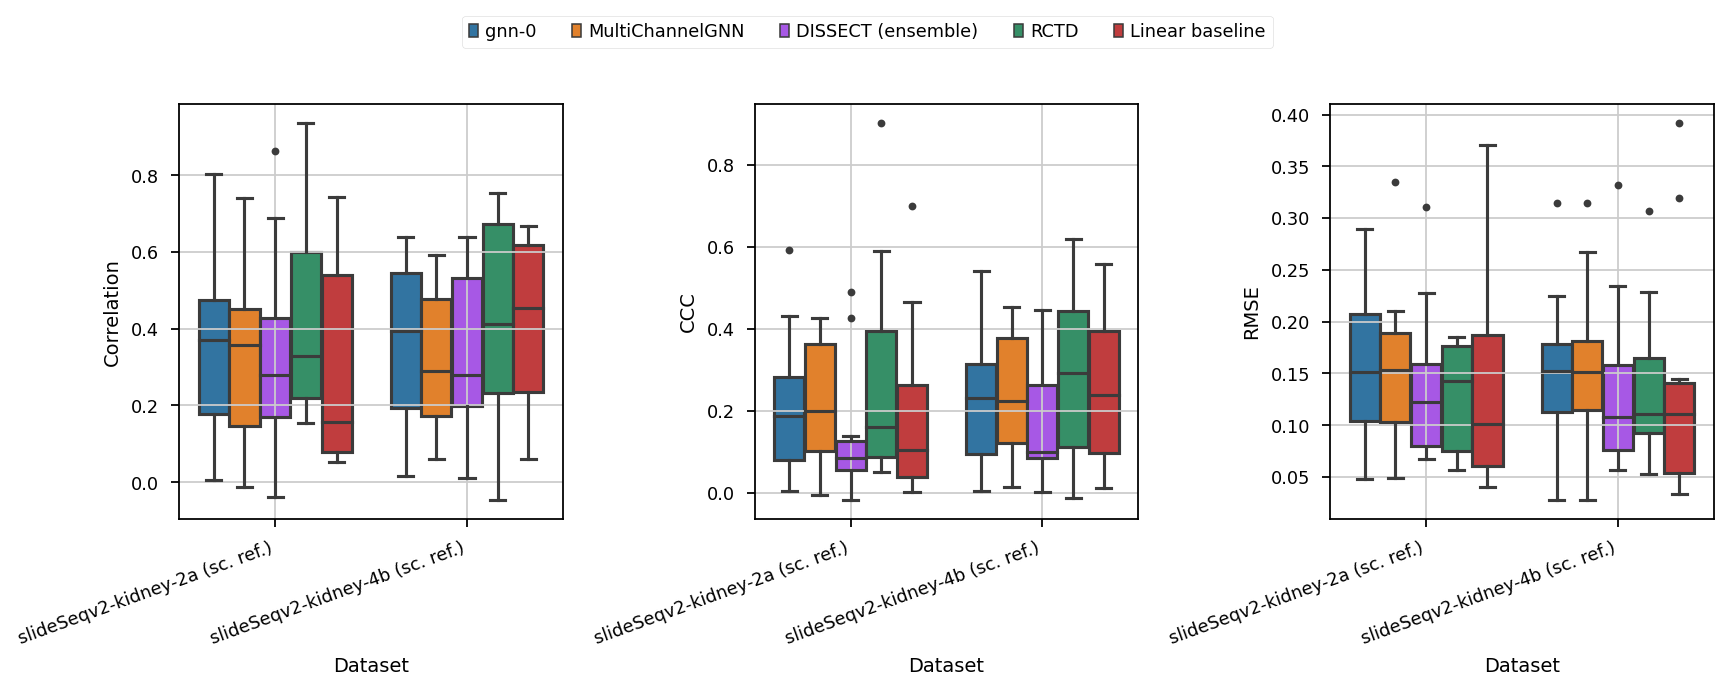

Correlation      RMSE       CCC  Correlation (samplewise)  \
Method                                                                          
DISSECT (ensemble)     0.334398  0.138281  0.154671                  0.499840   
Linear baseline        0.362695  0.138878  0.224024                  0.490959   
MultiChannelGNN        0.315039  0.156753  0.223371                  0.405603   
RCTD                   0.423068  0.132845  0.288149                  0.572025   
gnn-0                  0.364301  0.155472  0.217795                  0.444290   

                    RMSE (samplewise)  CCC (samplewise)       JSD  
Method                                                             
DISSECT (ensemble)           0.152242          0.382452  0.262538  
Linear baseline              0.159713          0.474031  0.242841  
MultiChannelGNN              0.167803          0.350879  0.271173  
RCTD                         0.136117          0.550439  0.234386  
gnn-0                        0.166932          0.406683  0.271077

Correlation      RMSE  \
Method             dataset                                                  
DISSECT (ensemble) slideSeqv2-kidney-2a (sc. ref.)     0.334640  0.139959   
                   slideSeqv2-kidney-4b (sc. ref.)     0.334155  0.136603   
Linear baseline    slideSeqv2-kidney-2a (sc. ref.)     0.308633  0.137258   
                   slideSeqv2-kidney-4b (sc. ref.)     0.416757  0.140498   
MultiChannelGNN    slideSeqv2-kidney-2a (sc. ref.)     0.316784  0.156505   
                   slideSeqv2-kidney-4b (sc. ref.)     0.313295  0.157001   
RCTD               slideSeqv2-kidney-2a (sc. ref.)     0.428553  0.127400   
                   slideSeqv2-kidney-4b (sc. ref.)     0.417584  0.138289   
gnn-0              slideSeqv2-kidney-2a (sc. ref.)     0.361939  0.159915   
                   slideSeqv2-kidney-4b (sc. ref.)     0.366662  0.151030   

                                                         CCC  \
Method             dataset                                     
DISSECT (ensemble) slideSeqv2-kidney-2a (sc. ref.)  0.142613   
                   slideSeqv2-kidney-4b (sc. ref.)  0.166729   
Linear baseline    slideSeqv2-kidney-2a (sc. ref.)  0.199033   
                   slideSeqv2-kidney-4b (sc. ref.)  0.249016   
MultiChannelGNN    slideSeqv2-kidney-2a (sc. ref.)  0.216482   
                   slideSeqv2-kidney-4b (sc. ref.)  0.230260   
RCTD               slideSeqv2-kidney-2a (sc. ref.)  0.291627   
                   slideSeqv2-kidney-4b (sc. ref.)  0.284672   
gnn-0              slideSeqv2-kidney-2a (sc. ref.)  0.215315   
                   slideSeqv2-kidney-4b (sc. ref.)  0.220274   

                                                    Correlation (samplewise)  \
Method             dataset                                                     
DISSECT (ensemble) slideSeqv2-kidney-2a (sc. ref.)                  0.529447   
                   slideSeqv2-kidney-4b (sc. ref.)                  0.470232   
Linear baseline    slideSeqv2-kidney-2a (sc. ref.)                  0.485189   
                   slideSeqv2-kidney-4b (sc. ref.)                  0.496730   
MultiChannelGNN    slideSeqv2-kidney-2a (sc. ref.)                  0.436955   
                   slideSeqv2-kidney-4b (sc. ref.)                  0.374251   
RCTD               slideSeqv2-kidney-2a (sc. ref.)                  0.624839   
                   slideSeqv2-kidney-4b (sc. ref.)                  0.519210   
gnn-0              slideSeqv2-kidney-2a (sc. ref.)                  0.447357   
                   slideSeqv2-kidney-4b (sc. ref.)                  0.441222   

                                                    RMSE (samplewise)  \
Method             dataset                                              
DISSECT (ensemble) slideSeqv2-kidney-2a (sc. ref.)           0.153244   
                   slideSeqv2-kidney-4b (sc. ref.)           0.151240   
Linear baseline    slideSeqv2-kidney-2a (sc. ref.)           0.154768   
                   slideSeqv2-kidney-4b (sc. ref.)           0.164657   
MultiChannelGNN    slideSeqv2-kidney-2a (sc. ref.)           0.166822   
                   slideSeqv2-kidney-4b (sc. ref.)           0.168785   
RCTD               slideSeqv2-kidney-2a (sc. ref.)           0.126993   
                   slideSeqv2-kidney-4b (sc. ref.)           0.145242   
gnn-0              slideSeqv2-kidney-2a (sc. ref.)           0.172213   
                   slideSeqv2-kidney-4b (sc. ref.)           0.161651   

                                                    CCC (samplewise)       JSD  
Method             dataset                                                      
DISSECT (ensemble) slideSeqv2-kidney-2a (sc. ref.)          0.372664  0.261928  
                   slideSeqv2-kidney-4b (sc. ref.)          0.392240  0.263148  
Linear baseline    slideSeqv2-kidney-2a (sc. ref.)          0.464939  0.261397  
                   slideSeqv2-kidney-4b (sc. ref.)          0.483122  0.224285  
MultiChannelGNN    slideSeqv2-kidn

In [14]:
name = "RCTD genes only"
name = None
id_values = {
    # "net/encoder_kwargs/mha_channel": [False, True],
    # "model/beta": [0.0, 7.5, "v2", "v3"],
    "data/use_rctd_genes": [False],
}
# save_path = f"./figures/performance_comparison_no_slideseq.png"
save_path = f"./figures/performance_comparison_slideseq_only.png"
# save_path = f"./figures/performance_comparison_slideseq_only_step_500.png"
(
    tabular_results,
    tabular_results_per_dataset,
    mean_results,
    std_results,
    all_cellwise_results,
    all_samplewise_results,
    methods_df,
) = evaluation_pipeline(
    dataset_map,
    dataset_path_map,
    id_values,
    name,
    extra_results=extra_results,
    extra_dataset_names=extra_dataset_names,
    extra_method_names=extra_names,
    baseline_tag=baseline_tag,
    extra_tag=ablation_tag,
    project=project,
    metrics=["Correlation", "CCC", "RMSE"],
    dataset_filter=dataset_filter,
    # save_path=save_path,
    # add_line_plot=True,
    use_bar_plot=False,
    return_all_dfs=True,
    # step=500,
    show=True,
)
display(tabular_results)
display(tabular_results_per_dataset)

In [21]:
methods_df

method                                         dataset  \
0  gnn-0                 slideSeqv2-kidney-4b (sc. ref.)   
1  gnn-0                 slideSeqv2-kidney-2a (sc. ref.)   
2  gnn-1  slideSeqv2-kidney-4b (sc. ref., not var. cut.)   
3  gnn-1  slideSeqv2-kidney-2a (sc. ref., not var. cut.)   
4  gnn-1               MERFISH-hypothalamus-1 (switched)   
5  gnn-1               MERFISH-hypothalamus-0 (switched)   
6  gnn-1                      seqFISH-heart-2 (switched)   
7  gnn-1                      seqFISH-heart-1 (switched)   
8  gnn-1                 slideSeqv2-kidney-4b (sc. ref.)   
9  gnn-1                 slideSeqv2-kidney-2a (sc. ref.)   

               run_name data/use_rctd_genes  
0     gallant-gorge-492                True  
1        lucky-dust-491                True  
2  cosmic-armadillo-485                None  
3       playful-sea-483                None  
4     eager-thunder-455                None  
5       neat-vortex-453                None  
6    clear-universe-451                None  
7      comfy-breeze-449                None  
8  dutiful-mountain-447                None  
9       proud-salad-444                None

### Further visualizations

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey="row", sharex="col")
axs = np.ravel(axs)
metric = "Correlation"
relevant_methods = ["DISSECT (ensemble)", "gnn-3"]
dataset = "slideSeq-4b"
methods_mask = all_cellwise_results["Method"].isin(relevant_methods)
data_mask = all_cellwise_results["dataset"] == dataset
# sns.barplot(all_cellwise_results.loc[methods_mask, :], x="Celltype", y=metric, hue="Method", ax=axs[0])
axs[0].set_title("Performance per celltype for selected methods")
sns.barplot(all_cellwise_results.loc[methods_mask & data_mask, :], x="Celltype", y=metric, hue="Method", ax=axs[1])
for ax in axs[-2:]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
for ax in axs:
    ax.grid(True)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey="row", sharex="col")
axs = np.ravel(axs)
metric = "Correlation"
relevant_methods = ["DISSECT (ensemble)", "gnn-3"]
methods_mask = all_cellwise_results["Method"].isin(relevant_methods)
sns.barplot(all_cellwise_results.loc[methods_mask, :], x="Celltype", y=metric, hue="Method", ax=axs[0])
axs[0].set_title("Performance per celltype for selected methods")
sns.barplot(all_cellwise_results, x="Method", y=metric, hue="dataset", ax=axs[1])
for ax in axs[-2:]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
for ax in axs:
    ax.grid(True)
plt.show()

### Single dataset analysis

In [ ]:
cellwise_results = compare_methods_new(
    all_results, groundtruth, methods=all_method_names, samplewise=False
)
samplewise_results = compare_methods_new(
    all_results, groundtruth, methods=all_method_names, samplewise=True
)

In [ ]:
cellwise_grouped = cellwise_results.groupby(["Method", "Fold"]).mean(numeric_only=True)
samplewise_grouped = samplewise_results.groupby(["Method", "Fold"]).mean(numeric_only=True)
pd.concat([cellwise_grouped, samplewise_grouped], axis=1)

In [ ]:
# plot performance per celltype
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharey="row", sharex="col")
axs = np.ravel(axs)
sns.barplot(cellwise_results, x="Celltype", y="Correlation", hue="Method", ax=axs[0])
mean_cellwise_results = cellwise_results.groupby(
    ["Method", "Fold"], as_index=False
).mean(numeric_only=True)
sns.barplot(mean_cellwise_results, x="Method", y="Correlation", ax=axs[1])

sns.barplot(cellwise_results, x="Celltype", y="RMSE", hue="Method", ax=axs[2])
mean_cellwise_results = cellwise_results.groupby(
    ["Method", "Fold"], as_index=False
).mean(numeric_only=True)
sns.barplot(mean_cellwise_results, x="Method", y="RMSE", ax=axs[3])
# rotate xticks
for ax in axs[-2:]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
for ax in axs:
    ax.grid(True)

plt.savefig(
    f"./figures/evaluation_{experiment_name}_cellwise.png", dpi=200, bbox_inches="tight"
)
plt.show()

In [ ]:
# samplewise results
# plot performance per celltype
metrics = ["Correlation", "RMSE"]
for metric in metrics:
    fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey="row", sharex="col")
    sns.boxplot(
        samplewise_results,
        x="Method",
        y=metric + " (samplewise)",
        hue="Fold",
        ax=axs[0],
    )
    mean_samplewise_results = samplewise_results.groupby(
        ["Method", "Fold"], as_index=False
    ).mean()
    sns.barplot(
        mean_samplewise_results, x="Method", y=metric + " (samplewise)", ax=axs[1]
    )
    # plt.savefig(
    #     f"./figures/evaluation_{experiment_name}_cellwise.png", dpi=200, bbox_inches="tight"
    # )
    plt.show()

## Qualitative analysis

### Mouse brain

In [7]:
# load data
st_path = "./data/spatial/V1_Mouse_Brain_Sagittal_Anterior.h5ad"
st_data = sc.read_h5ad(st_path)

project = "multi-channel-gnn"
run_name = "serene-jazz-259"

result = get_result_for_run_name(run_name, project=project)

st_data.obs = pd.concat([st_data.obs, result], axis=1)

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
st_data.uns["spatial"].keys()

dict_keys(['V1_Mouse_Brain_Sagittal_Anterior'])

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


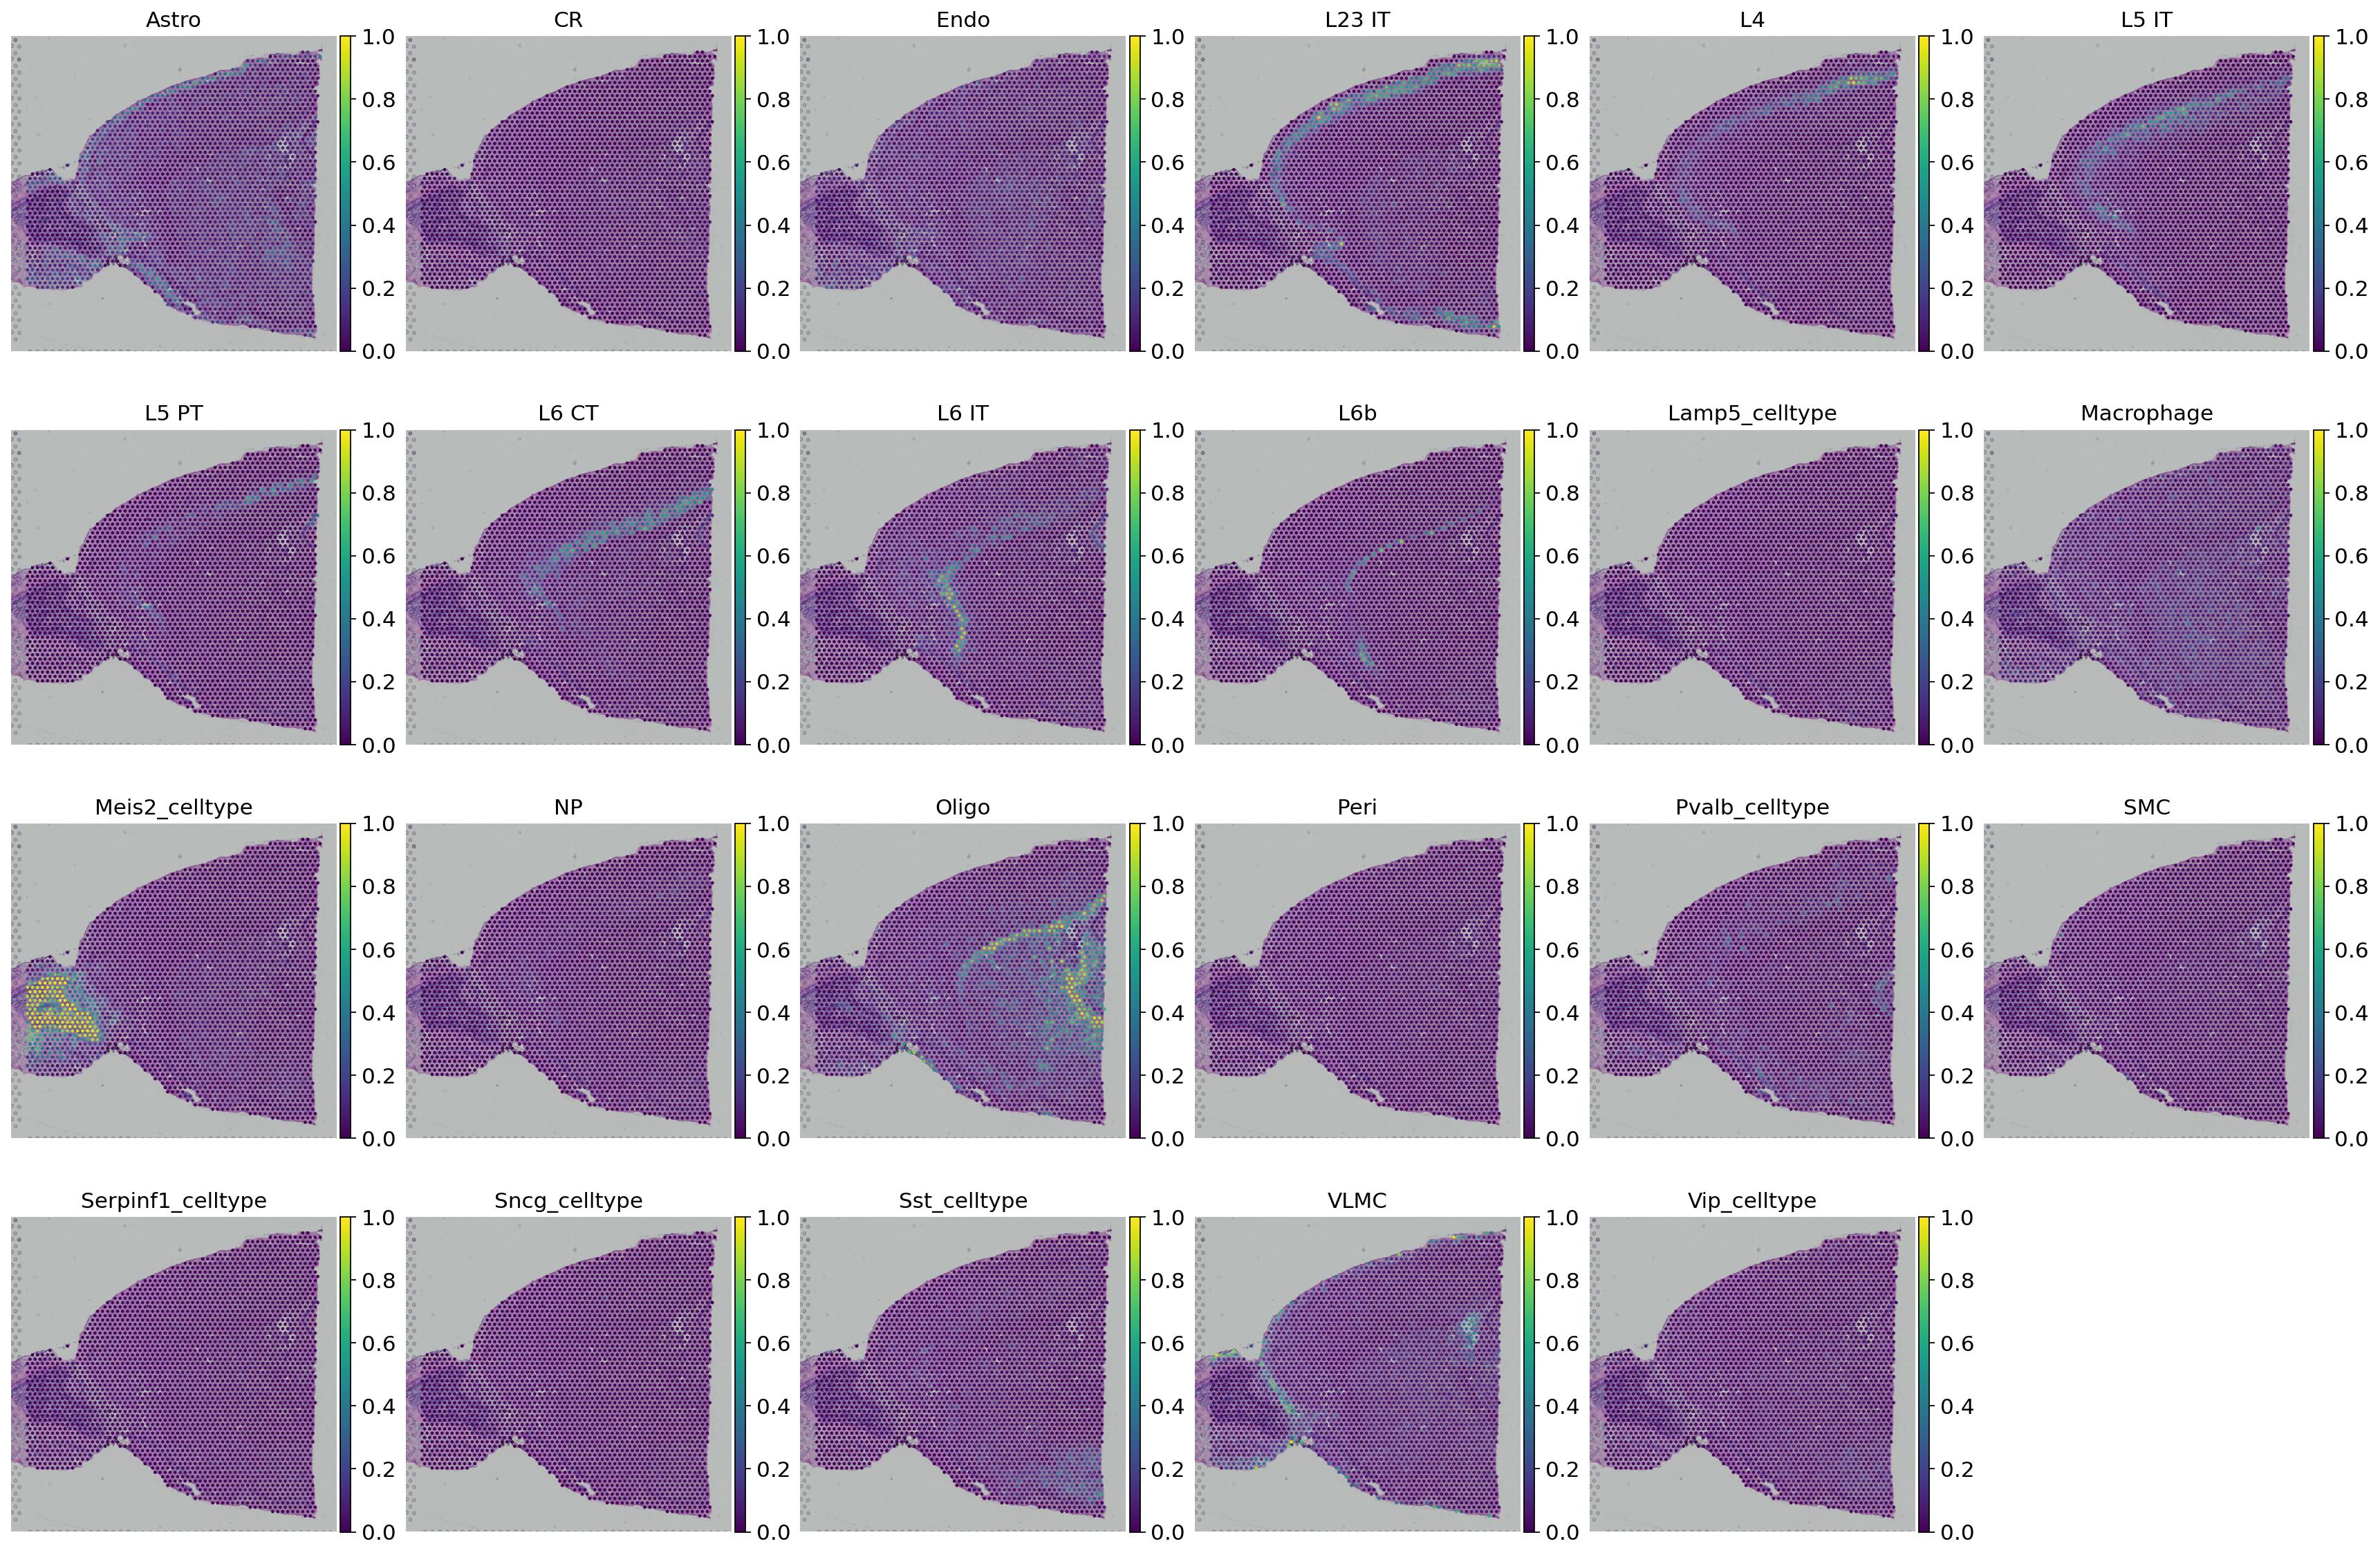

In [23]:
st_data = sc.read_h5ad(st_path)
assert (result.index == st_data.obs.index).all()
st_data.obs = pd.concat([st_data.obs, result], axis=1)
fig = sc.pl.spatial(
    st_data, color=list(result.columns)[0::], show=False, save=False, vmin=0.0, vmax=1.0, wspace=0.1, ncols=6)
plt.savefig(f"./figures/mouse_brain_{run_name}.png", dpi=80, bbox_inches="tight")
plt.show()

In [ ]:
# load data
st_path = "./data/spatial/V1_Mouse_Brain_Sagittal_Anterior.h5ad"
st_data = sc.read_h5ad(st_path)

dissect_result = load_dissect_results("experiments/experiment_mouse_st")[1]
st_data.obs = pd.concat([st_data.obs, dissect_result], axis=1)
fig = sc.pl.spatial(st_data, color=result.columns, show=False, save=False, vmin=0.0, vmax=1.0)
plt.savefig("./figures/mouse_brain_dissect_ensemble.png", dpi=300, bbox_inches="tight")
plt.show()

## Old analysis

### Predicted max celltype per spot

In [ ]:
for k, df in enumerate(results_per_seed):
    max_celltypes = df.idxmax(axis=1)
    st_data.obs[f"celltype-{k}"] = max_celltypes
    sq.pl.spatial_scatter(st_data, color=f"celltype-{k}")

### Celltype distribution across tissue

In [ ]:
st_data.obs[celltypes] = new_result[celltypes]
sq.pl.spatial_scatter(st_data, color="L5 IT")
plt.savefig(
    f"{base_path}/figures/single_celltype_{experiment_name}.png",
    dpi=200,
    bbox_inches="tight",
)

In [ ]:
st_data.obs[celltypes] = ensemble_result[celltypes]
sq.pl.spatial_scatter(st_data, color=celltypes)